In [64]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as ply
from darts import TimeSeries

import numpy as np
import torch
from darts.utils.timeseries_generation import(
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,)

from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,)
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [65]:
file = ("cleaned_files/immigration.csv")
df=pd.read_csv(file)
df

,immigrants,date
0,18812.66667,2005-01
1,18812.66667,2005-02
2,18812.66667,2005-03
3,24823.66667,2005-04
4,24823.66667,2005-05
...,...,...
199,40970.33333,2021-08
200,40970.33333,2021-09
201,46063.33333,2021-10
202,46063.33333,2021-11


In [66]:
series = TimeSeries.from_dataframe(df, "date", "immigrants")
series

<TimeSeries (DataArray) (date: 204, component: 1, sample: 1)>
array([[[18812.66667]],

       [[18812.66667]],

       [[18812.66667]],

       [[24823.66667]],

       [[24823.66667]],

       [[24823.66667]],

       [[25315.     ]],

       [[25315.     ]],

       [[25315.     ]],

       [[18462.     ]],

...

       [[23495.66667]],

       [[24812.66667]],

       [[24812.66667]],

       [[24812.66667]],

       [[40970.33333]],

       [[40970.33333]],

       [[40970.33333]],

       [[46063.33333]],

       [[46063.33333]],

       [[46063.33333]]])
Coordinates:
  * date       (date) datetime64[ns] 2005-01-01 2005-02-01 ... 2021-12-01
  * component  (component) object 'immigrants'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

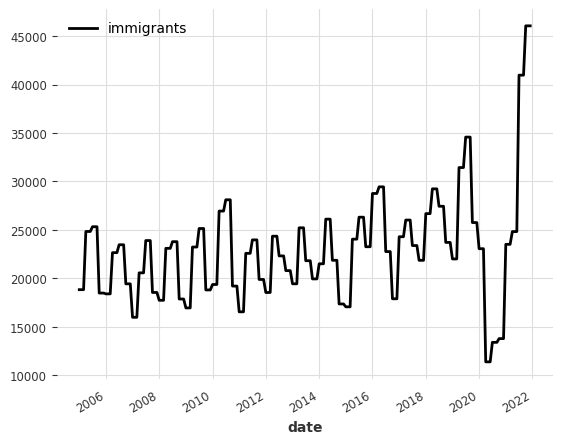

In [73]:
series.plot()

In [68]:
train, val =  series[:-36], series[-36:]



In [69]:
series_model = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0
)

In [70]:
series_model.fit([train],verbose=True)

2022-11-20 00:24:06 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-11-20 00:24:06 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-11-20 00:24:06 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-11-20 00:24:06 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-11-20 00:24:06 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 5/5 [00:00<00:00,  7.63it/s, loss=2.94e+06, train_loss=3.93e+6]

2022-11-20 00:25:12 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 5/5 [00:00<00:00,  7.61it/s, loss=2.94e+06, train_loss=3.93e+6]


In [79]:
pred = series_model.predict(n=55, series=train)



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]


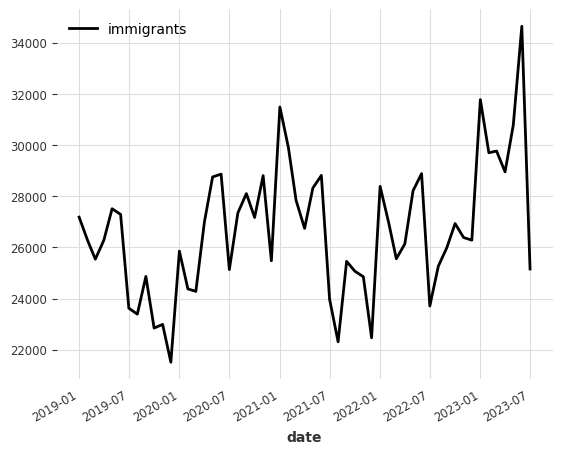

In [80]:
pred.plot()
